In [1]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut, cross_val_score, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data = pd.read_csv("/home/yuxuan/kaggle/heart_failure_clinical_records_dataset.csv")

X = heart_data.iloc[:, 0:11]
y = heart_data['DEATH_EVENT']

selected_feature = ['serum_creatinine','age', 'ejection_fraction','creatinine_phosphokinase']
X_processed = X[selected_feature]
X_processed = StandardScaler().fit_transform(X_processed)
X_train, X_test, y_train, y_test = train_test_split(X_processed,y,test_size=0.2,random_state=2)

In [3]:
model = SVC(kernel='rbf',random_state=1,C=10, gamma = 0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
confusion

# plt.matshow(confusion)


array([[40,  3],
       [ 7, 10]])

<Figure size 432x288 with 0 Axes>

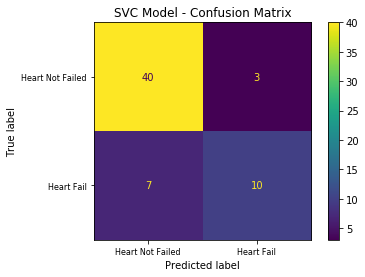

In [4]:
plt.figure()
plot_confusion_matrix(model,X_test,y_test)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=8)
plt.yticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=8)
plt.show()

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=["Heart Not Failed", "Heart Fail"]))


                  precision    recall  f1-score   support

Heart Not Failed       0.85      0.93      0.89        43
      Heart Fail       0.77      0.59      0.67        17

        accuracy                           0.83        60
       macro avg       0.81      0.76      0.78        60
    weighted avg       0.83      0.83      0.83        60



In [6]:
from sklearn.metrics import precision_recall_curve, roc_curve,auc
def roc(model, x_val, y_val):
    print('Start drawing the roc curve \n')
    y_pred_keras = model.predict(x_val).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    # plt.cla()
    # plt.figure(figsize=(4, 3))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='AUROC (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    print('AUROC (area = {:.3f})'.format(auc_keras))
    return auc_keras

Start drawing the roc curve 

AUROC (area = 0.759)


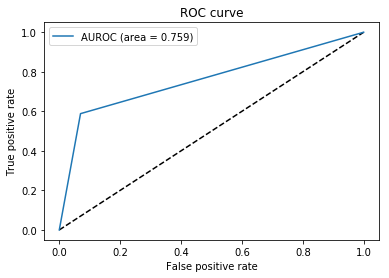

0.759233926128591

In [7]:
roc(model,X_test,y_test)

In [8]:
def prcurve(model, x_val, y_val):
    lr_precision, lr_recall, _ = precision_recall_curve(y_val, model.decision_function(x_val))
    lr_auc = auc(lr_recall, lr_precision)
    print('PRAUC:  auc=%.3f' % (lr_auc))
    no_skill = len(y_val[y_val == 1]) / len(y_val)
    plt.cla()
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='SVM with RBF kernel')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    return lr_auc

PRAUC:  auc=0.576


0.575514620464572

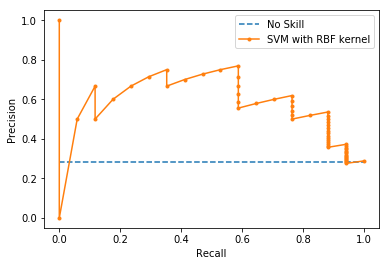

In [9]:
prcurve(model,X_test,y_test)

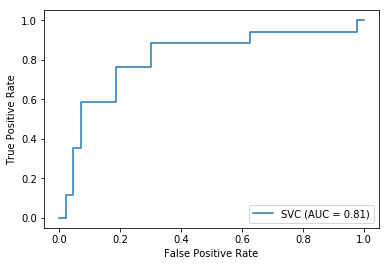

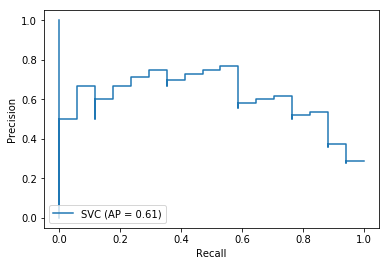

In [10]:
plot_roc_curve(model,X_test,y_test)
plot_precision_recall_curve(model,X_test,y_test)


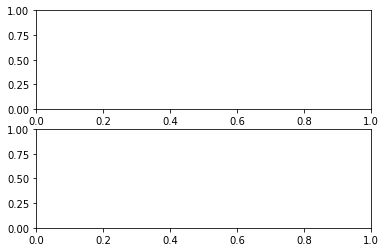

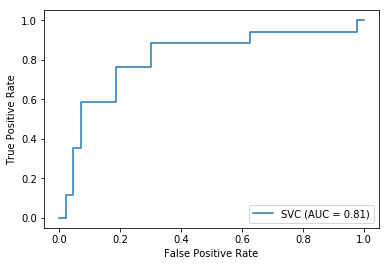

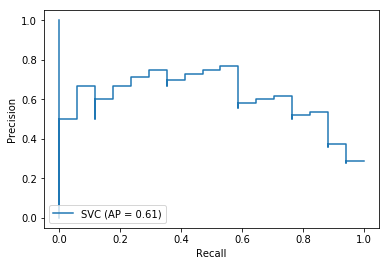

In [11]:
fig,axes = plt.subplots(2,1)
axes = axes.ravel()
axes[0] = plot_roc_curve(model,X_test,y_test)
axes[1] = plot_precision_recall_curve(model,X_test,y_test)

In [19]:
train_size, train_acc,test_acc =learning_curve(model,X_train,y_train,cv=5)
learn_df = pd.DataFrame({"Train size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars="Train_size")
sns.lineplot(x="Train_size",y="value",data=learn_df,hue="variable")
plt.title("Learning Curve")
plt.ylabel("Accuracy")


KeyError: 'Train_size'

In [18]:
train_size,train_acc,test_acc=learning_curve(model, X_train, y_train, cv=5)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars="Train_size")

# train_size
# train_acc
test_acc


array([[0.66666667, 0.79166667, 0.6875    , 0.6875    , 0.68085106],
       [0.66666667, 0.6875    , 0.75      , 0.72916667, 0.68085106],
       [0.79166667, 0.70833333, 0.77083333, 0.6875    , 0.70212766],
       [0.72916667, 0.70833333, 0.72916667, 0.66666667, 0.72340426],
       [0.8125    , 0.70833333, 0.75      , 0.70833333, 0.70212766]])

In [17]:
learn_df = pd.DataFrame({"Train size":train_size,"Train_Accuracy":train_acc.mean(axis=1),"Test_Accuracy":test_acc.mean(axis=1)})
learn_df


,Test_Accuracy,Train size,Train_Accuracy
0,0.702837,19,0.810526
1,0.702837,62,0.838710
2,0.732092,105,0.813333
3,0.711348,148,0.772973
4,0.736259,191,0.762304


In [14]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                  'B': {0: 1, 1: 3, 2: 5},
                  'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [15]:
df.melt(id_vars='A')

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [16]:
learn_df.melt(id_vars="Train size")

,Train size,variable,value
0,19,Test_Accuracy,0.702837
1,62,Test_Accuracy,0.702837
2,105,Test_Accuracy,0.732092
3,148,Test_Accuracy,0.711348
4,191,Test_Accuracy,0.736259
5,19,Train_Accuracy,0.810526
6,62,Train_Accuracy,0.838710
7,105,Train_Accuracy,0.813333
8,148,Train_Accuracy,0.772973
9,191,Train_Accuracy,0.762304
